# This notebook presents the techniques using PyTorch & applied to the CIFAR100 dataset
# Models used ANN,CNN & ResNet

In [ ]:
#import os
import torch
import torchvision
import numpy as np
#import tarfile
import torch.nn as nn
import torch.nn.functional as F
#from torchvision.datasets.utils import download_url
from torchvision.datasets import CIFAR100
#from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from torch.utils.data import random_split
from torch.utils.data import DataLoader
#plottings 
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.rcParams['figure.facecolor'] = '#ffffff'

In [105]:
dataset = CIFAR100(root = 'data/', download = True, transform = ToTensor())
test_ds = CIFAR100(root = 'data/', train = False, transform = ToTensor())
#train_dataset = CIFAR100(root = 'data/', download = True, transform = train_transform)
#test_dataset = CIFAR100(root = 'data/', train = False, transform = test_transform)

Files already downloaded and verified


In [106]:
print(dataset)
print(test_ds)

Dataset CIFAR100
    Number of datapoints: 50000
    Root location: data/
    Split: Train
    StandardTransform
Transform: ToTensor()
Dataset CIFAR100
    Number of datapoints: 10000
    Root location: data/
    Split: Test
    StandardTransform
Transform: ToTensor()


In [107]:
dataset_size = len(dataset)
test_ds_size = len(test_ds)
print('total images  in dataset:', dataset_size)
print('total images in test dataset:', test_ds_size)

total images  in dataset: 50000
total images in test dataset: 10000


In [108]:
print('total classes:', len(dataset.classes))
print(dataset.classes)

total classes: 100
['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'wha

In [109]:
for img, label in dataset:
  print('img.shape: ', img.shape)
  print('label: ', label)
  print('img tensor: ') 
  print(img)
  break

img.shape:  torch.Size([3, 32, 32])
label:  19
img tensor: 
tensor([[[1.0000, 1.0000, 1.0000,  ..., 0.7647, 0.8314, 0.7137],
         [1.0000, 0.9961, 0.9961,  ..., 0.6667, 0.6314, 0.5725],
         [1.0000, 0.9961, 1.0000,  ..., 0.7412, 0.6510, 0.4745],
         ...,
         [0.5804, 0.5569, 0.5490,  ..., 0.1176, 0.2549, 0.2980],
         [0.4784, 0.4706, 0.4941,  ..., 0.0863, 0.3804, 0.5529],
         [0.3412, 0.3451, 0.3961,  ..., 0.1333, 0.4118, 0.5412]],

        [[1.0000, 1.0000, 1.0000,  ..., 0.8039, 0.8784, 0.7608],
         [1.0000, 0.9961, 0.9961,  ..., 0.6902, 0.6588, 0.6039],
         [1.0000, 0.9961, 1.0000,  ..., 0.7804, 0.6980, 0.5216],
         ...,
         [0.7255, 0.7137, 0.7020,  ..., 0.0667, 0.2431, 0.3020],
         [0.6157, 0.6078, 0.6275,  ..., 0.0627, 0.4392, 0.6314],
         [0.4784, 0.4784, 0.5255,  ..., 0.1412, 0.5216, 0.6784]],

        [[1.0000, 1.0000, 1.0000,  ..., 0.7569, 0.8000, 0.6549],
         [1.0000, 0.9961, 0.9961,  ..., 0.5882, 0.5098, 0.4431]

In [110]:
variable_name = ""
def show_example(img, label):
    print('Label: ', dataset.classes[label], "("+str(label)+")")
    plt.imshow(img.permute(1, 2, 0))

**View some elements in the dataset**

Label:  dinosaur (29)


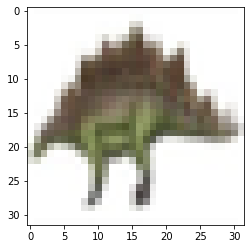

In [111]:
img, label = dataset[1]
show_example(img, label)

Label:  rose (70)


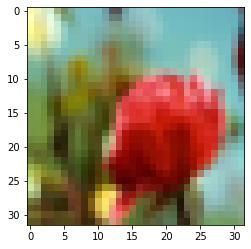

In [112]:
show_example(*dataset[7500])

Preprocessing the train data

In [113]:
random_seed = 43
torch.manual_seed(random_seed);

In [114]:
val_size = 10000
train_size = len(dataset) - val_size

train_ds, val_ds = random_split(dataset, [train_size, val_size])
print('total images in our training set: ', len(train_ds))
print('total images in our validation set: ', len(val_ds))

total images in our training set:  40000
total images in our validation set:  10000


**Define the data loaders for training and validation, to load the data in batches**

In [115]:
batch_size=128

In [116]:
train_dl = DataLoader(train_ds, 
                      batch_size, 
                      shuffle=True, 
                      num_workers=4, 
                      pin_memory=True)

val_dl = DataLoader(val_ds, 
                    batch_size,       # note lesson on feedforward has the *2
                    num_workers=4, 
                    pin_memory=True)

test_dl = DataLoader(test_ds, 
                    batch_size,      # note lesson on feedforward has *2 batch_size
                    num_workers=4, 
                    pin_memory=True)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [117]:
from torchvision.utils import make_grid

def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.set_xticks([]) 
        ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
        break

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


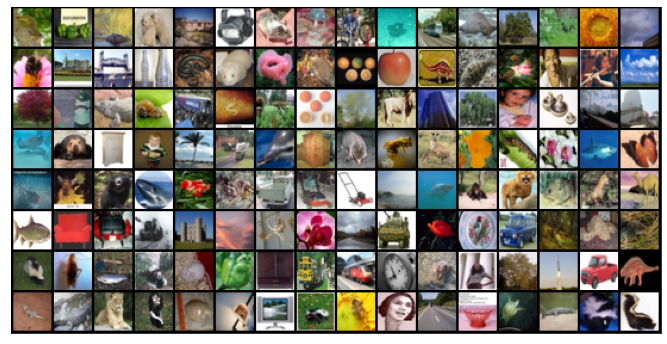

In [118]:
show_batch(train_dl)

Settings: Device and DeviceDataLoaders

To seamlessly use a GPU, if one is available, we define a couple of helper functions (get_default_device & to_device) and a helper class DeviceDataLoader to move our model & data to the GPU as required.

In [119]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [120]:

torch.cuda.is_available()

True

In [121]:
device = get_default_device()
device

device(type='cuda')

In [122]:
train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(val_dl, device)
test_dl = DeviceDataLoader(test_dl, device)

In [123]:
def plot_losses(history):
    losses = [x['val_loss'] for x in history]
    plt.plot(losses, '-x')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.title('Loss vs. No. of epochs');

In [124]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

**Train our First Model Using Feed Forward**

In [125]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [126]:
class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))

In [127]:
input_size = 3*32*32      #3*32*32=3072
output_size = len(dataset.classes)
hidden_size1 = 1034 
hidden_size2 = 1034 

In [128]:
class CIFAR100Model(ImageClassificationBase):     # feed forward
    def __init__(self):
        super().__init__()
        # hidden layers
        self.linear1a = nn.Linear(input_size, hidden_size1)
        self.linear1b = nn.Linear(hidden_size1, hidden_size2)
        self.linear2 = nn.Linear(hidden_size2, output_size)
        
    def forward(self, xb):
        # Flatten images into vectors
        xb = xb.view(xb.size(0), -1)

        # Apply hidden layers & activation functions
        out = self.linear1a(xb)
        out = F.relu(out)
        out = self.linear1b(out)
        out = F.relu(out)

        #apply output layer
        out = self.linear2(out)
        return out

In [129]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [130]:
model_ff = to_device(CIFAR100Model(), device)

In [131]:
history_ff = [evaluate(model_ff, val_dl)]
history_ff

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


[{'val_acc': 0.009889240376651287, 'val_loss': 4.606130599975586}]

In [132]:
history_ff += fit(30, 0.1, model_ff, train_dl, val_dl)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch [0], val_loss: 4.0665, val_acc: 0.0652
Epoch [1], val_loss: 3.8537, val_acc: 0.1079
Epoch [2], val_loss: 3.8948, val_acc: 0.0980
Epoch [3], val_loss: 3.6311, val_acc: 0.1458
Epoch [4], val_loss: 3.5535, val_acc: 0.1610
Epoch [5], val_loss: 3.5335, val_acc: 0.1581
Epoch [6], val_loss: 3.5656, val_acc: 0.1668
Epoch [7], val_loss: 3.5655, val_acc: 0.1582
Epoch [8], val_loss: 3.4911, val_acc: 0.1840
Epoch [9], val_loss: 3.3941, val_acc: 0.1868
Epoch [10], val_loss: 3.4566, val_acc: 0.1839
Epoch [11], val_loss: 3.2735, val_acc: 0.2218
Epoch [12], val_loss: 3.2648, val_acc: 0.2194
Epoch [13], val_loss: 3.3727, val_acc: 0.2080
Epoch [14], val_loss: 3.2006, val_acc: 0.2314
Epoch [15], val_loss: 3.3162, val_acc: 0.2195
Epoch [16], val_loss: 3.3243, val_acc: 0.2112
Epoch [17], val_loss: 3.3870, val_acc: 0.2063
Epoch [18], val_loss: 3.3017, val_acc: 0.2271
Epoch [19], val_loss: 3.2597, val_acc: 0.2285
Epoch [20], val_loss: 3.2826, val_acc: 0.2259
Epoch [21], val_loss: 3.2862, val_acc: 0.227

Before you train the model, it's a good idea to check the validation loss & accuracy with the initial set of weights.

In [34]:
history_ff += fit(20, 0.01, model_ff, train_dl, val_dl)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch [0], val_loss: 3.1588, val_acc: 0.2815
Epoch [1], val_loss: 3.1712, val_acc: 0.2829
Epoch [2], val_loss: 3.1770, val_acc: 0.2813
Epoch [3], val_loss: 3.1804, val_acc: 0.2821
Epoch [4], val_loss: 3.1751, val_acc: 0.2848
Epoch [5], val_loss: 3.1851, val_acc: 0.2876
Epoch [6], val_loss: 3.1848, val_acc: 0.2843
Epoch [7], val_loss: 3.2009, val_acc: 0.2835
Epoch [8], val_loss: 3.1988, val_acc: 0.2836
Epoch [9], val_loss: 3.1987, val_acc: 0.2856
Epoch [10], val_loss: 3.2007, val_acc: 0.2812
Epoch [11], val_loss: 3.2083, val_acc: 0.2843
Epoch [12], val_loss: 3.2040, val_acc: 0.2842
Epoch [13], val_loss: 3.2296, val_acc: 0.2822
Epoch [14], val_loss: 3.2236, val_acc: 0.2846
Epoch [15], val_loss: 3.2269, val_acc: 0.2826
Epoch [16], val_loss: 3.2252, val_acc: 0.2850
Epoch [17], val_loss: 3.2384, val_acc: 0.2837
Epoch [18], val_loss: 3.2397, val_acc: 0.2843
Epoch [19], val_loss: 3.2460, val_acc: 0.2794


In [35]:
history_ff += fit(10, 0.001, model_ff, train_dl, val_dl)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch [0], val_loss: 3.2337, val_acc: 0.2836
Epoch [1], val_loss: 3.2358, val_acc: 0.2847
Epoch [2], val_loss: 3.2374, val_acc: 0.2858
Epoch [3], val_loss: 3.2376, val_acc: 0.2861
Epoch [4], val_loss: 3.2392, val_acc: 0.2869
Epoch [5], val_loss: 3.2399, val_acc: 0.2868
Epoch [6], val_loss: 3.2401, val_acc: 0.2856
Epoch [7], val_loss: 3.2418, val_acc: 0.2857
Epoch [8], val_loss: 3.2421, val_acc: 0.2860
Epoch [9], val_loss: 3.2430, val_acc: 0.2851


In [36]:
history_ff += fit(10, 0.0001, model_ff, train_dl, val_dl)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch [0], val_loss: 3.2429, val_acc: 0.2853
Epoch [1], val_loss: 3.2430, val_acc: 0.2856
Epoch [2], val_loss: 3.2430, val_acc: 0.2859
Epoch [3], val_loss: 3.2431, val_acc: 0.2860
Epoch [4], val_loss: 3.2432, val_acc: 0.2860
Epoch [5], val_loss: 3.2433, val_acc: 0.2860
Epoch [6], val_loss: 3.2433, val_acc: 0.2861
Epoch [7], val_loss: 3.2434, val_acc: 0.2858
Epoch [8], val_loss: 3.2434, val_acc: 0.2860
Epoch [9], val_loss: 3.2436, val_acc: 0.2861


In [37]:
test_ff = evaluate(model_ff, test_dl)
test_ff

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


{'val_acc': 0.2965783178806305, 'val_loss': 3.2164485454559326}

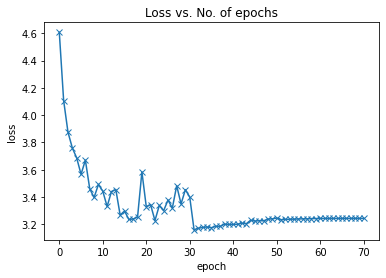

In [39]:
plot_losses(history_ff)

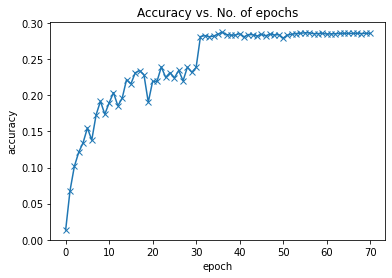

In [40]:
plot_accuracies(history_ff)

In [ ]:
Train our Second Model - Convolutional Neural Networks

#Train our Second Model - Convolutional Neural Networks


The convolutional neural network (CNN) is a class of deep learning neural networks. They can be found at the core of everything from Facebook’s photo tagging to self-driving cars. They’re working hard behind the scenes in everything from healthcare to security.

A CNN has
Convolutional layers
ReLU layers
Pooling layers
a Fully connecte**d layer**

In [41]:
class Cifar100CnnModel(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            # input: 3 x 32 x 32
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            # output: 32 x 32 x 32
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            # output: 64 x 32 x 32
            nn.ReLU(),
            # output: 64 x 32 x 32
            nn.MaxPool2d(2, 2), # output: 64 x 16 x 16

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 128 x 8 x 8

            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 256 x 4 x 4

            nn.Flatten(), 
            nn.Linear(256*4*4, 1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, 100))
        
    def forward(self, xb):
        return self.network(xb)

In [42]:
# the torch.no_grad only applies during the evaluate phase
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [43]:
model_cnn = to_device(Cifar100CnnModel(), device)
model_cnn

Cifar100CnnModel(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Flatten(start_dim=1, end_dim=-1)
    (16): Linear(in_features=4096, out_features=1024, bias=True)
    (17): ReLU()
    (18): Linear(in_fea

In [44]:
history_cnn = [evaluate(model_cnn, val_dl)]
history_cnn

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


[{'val_acc': 0.011174841783940792, 'val_loss': 4.6055121421813965}]

In [51]:
num_epochs_cnn = 5
opt_func = torch.optim.Adam
lr_cnn = 0.001

In [52]:
%%time
history_cnn = fit(num_epochs_cnn, lr_cnn, model_cnn, train_dl, val_dl, opt_func)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch [0], val_loss: 3.2917, val_acc: 0.1984
Epoch [1], val_loss: 3.2120, val_acc: 0.2183
Epoch [2], val_loss: 3.1141, val_acc: 0.2349
Epoch [3], val_loss: 3.0259, val_acc: 0.2506
Epoch [4], val_loss: 2.9824, val_acc: 0.2654
CPU times: user 53min 22s, sys: 26.6 s, total: 53min 49s
Wall time: 53min 42s


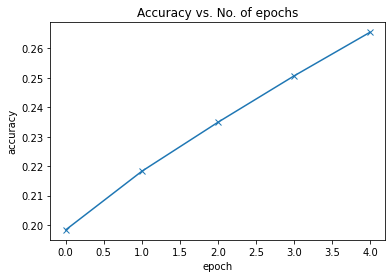

In [53]:
plot_accuracies(history_cnn)

In [55]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

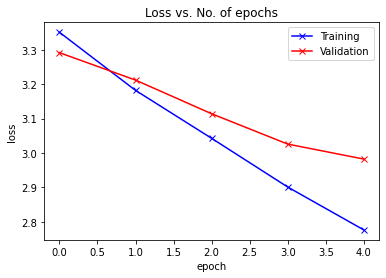

In [56]:
plot_losses(history_cnn)

In [161]:
def predict_image(img, model):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return dataset.classes[preds[0].item()]

Label: lamp , Predicted: lamp


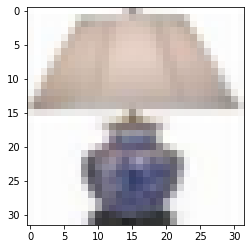

In [66]:
img, label = test_ds[3002]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model_cnn))

In [67]:
test_cnn = evaluate(model_cnn, test_dl) 
test_cnn

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


{'val_acc': 0.27848100662231445, 'val_loss': 2.9584131240844727}

In [68]:
test_dl = DeviceDataLoader(DataLoader(test_ds, batch_size*2), device)
result_cnn = evaluate(model_cnn, test_dl)
result_cnn

{'val_acc': 0.2789062559604645, 'val_loss': 2.958509922027588}

#Train our Third Model using ResNets, Regularization and Data Augmentation

In [143]:
import torchvision.transforms as tt
# Data transforms (normalization & data augmentation)
#stats = ((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)) - cifar10
stats = ((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))      #cifar100

train_tfms = tt.Compose([tt.RandomCrop(32, padding=4, padding_mode='reflect'), 
                         tt.RandomHorizontalFlip(), 
                         # tt.RandomRotate
                         # tt.RandomResizedCrop(256, scale=(0.5,0.9), ratio=(1, 1)), 
                         # tt.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1),
                         tt.ToTensor(), 
                         tt.Normalize(*stats,inplace=True)])
valid_tfms = tt.Compose([tt.ToTensor(), tt.Normalize(*stats)])

In [144]:
train_ds = CIFAR100(root = 'data/', download = True, transform = train_tfms)
valid_ds = CIFAR100(root = 'data/', train = False, transform = valid_tfms)

Files already downloaded and verified


In [145]:
batch_size = 400

In [146]:
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=3, pin_memory=True)
valid_dl = DataLoader(valid_ds, batch_size*2, num_workers=3, pin_memory=True)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [147]:
device = get_default_device()
device

device(type='cuda')

In [148]:
train_dl = DeviceDataLoader(train_dl, device)
valid_dl = DeviceDataLoader(valid_dl, device)

In [149]:
def conv_block(in_channels, out_channels, pool=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1), 
              nn.BatchNorm2d(out_channels), 
              nn.ReLU(inplace=True)]
    if pool: layers.append(nn.MaxPool2d(2))
    return nn.Sequential(*layers)

class ResNet9(ImageClassificationBase):
    def __init__(self, in_channels, num_classes):
        super().__init__()
        # 3 x 32 x 32
        self.conv1 = conv_block(in_channels, 64)         # 64 x 32 x 32
        self.conv2 = conv_block(64, 128, pool=True)      # 128 x 16 x 16
        self.res1 = nn.Sequential(conv_block(128, 128), 
                                  conv_block(128, 128))  # 128 x 16 x 16
        
        self.conv3 = conv_block(128, 256, pool=True)    # 256 x 8 x 8
        self.conv4 = conv_block(256, 512, pool=True)    # 512 x 4 x 4
        self.res2 = nn.Sequential(conv_block(512, 512), 
                                  conv_block(512, 512))  # 512 x 4 x 4
        
        self.classifier = nn.Sequential(nn.MaxPool2d(4), # 512 x 1 x 1
                                        nn.Flatten(),     # 512
                                        nn.Dropout(0.2),  
                                        nn.Linear(512, num_classes)) # 100
        
    def forward(self, xb):
        out1 = self.conv1(xb)
        out2 = self.conv2(out1)
        out3 = self.res1(out2) + out2
        out4 = self.conv3(out3)
        out5 = self.conv4(out4)
        out6 = self.res2(out5) + out5
        out = self.classifier(out6)
        return out

In [150]:
model_resnet9 = to_device(ResNet9(3, 100), device)
model_resnet9

ResNet9(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=Tr

In [151]:
# call model eval before doing any evaluation - good practice
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()      
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def fit_one_cycle(epochs, max_lr, model, train_loader, val_loader, 
                  weight_decay=0, grad_clip=None, opt_func=torch.optim.SGD):
    torch.cuda.empty_cache()
    history = []
    
    # Set up custom optimizer with weight decay
    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
    # Set up one-cycle learning rate scheduler
    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs, 
                                                steps_per_epoch=len(train_loader))
    
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        lrs = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            
            # Gradient clipping
            if grad_clip: 
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)
            
            optimizer.step()
            optimizer.zero_grad()
            
            # Record & update learning rate
            lrs.append(get_lr(optimizer))
            sched.step()
        
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['lrs'] = lrs
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [152]:
history_resnet9 = [evaluate(model_resnet9, valid_dl)]
history_resnet9

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


[{'val_acc': 0.010096153244376183, 'val_loss': 4.608874797821045}]

In [153]:
epochs = 30
max_lr = 0.01
grad_clip = 0.1
weight_decay = 1e-4
opt_func = torch.optim.Adam

In [154]:
%%time
history_resnet9 += fit_one_cycle(epochs, max_lr, model_resnet9, train_dl, valid_dl, 
                             grad_clip=grad_clip, 
                             weight_decay=weight_decay, 
                             opt_func=opt_func)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch [0], val_loss: 3.5014, val_acc: 0.1737
Epoch [1], val_loss: 3.2661, val_acc: 0.2228
Epoch [2], val_loss: 2.7833, val_acc: 0.3024
Epoch [3], val_loss: 2.5155, val_acc: 0.3488
Epoch [4], val_loss: 2.2063, val_acc: 0.4166
Epoch [5], val_loss: 2.3029, val_acc: 0.4016
Epoch [6], val_loss: 1.9933, val_acc: 0.4713
Epoch [7], val_loss: 2.0682, val_acc: 0.4550
Epoch [8], val_loss: 1.8691, val_acc: 0.4864
Epoch [9], val_loss: 1.8763, val_acc: 0.4934
Epoch [10], val_loss: 2.1996, val_acc: 0.4474
Epoch [11], val_loss: 1.7741, val_acc: 0.5246
Epoch [12], val_loss: 1.7325, val_acc: 0.5412
Epoch [13], val_loss: 1.5911, val_acc: 0.5696
Epoch [14], val_loss: 1.5861, val_acc: 0.5570
Epoch [15], val_loss: 1.5617, val_acc: 0.5737
Epoch [16], val_loss: 1.4324, val_acc: 0.6013
Epoch [17], val_loss: 1.6720, val_acc: 0.5588
Epoch [18], val_loss: 1.3478, val_acc: 0.6217
Epoch [19], val_loss: 1.4252, val_acc: 0.6065
Epoch [20], val_loss: 1.3084, val_acc: 0.6384
Epoch [21], val_loss: 1.2534, val_acc: 0.653

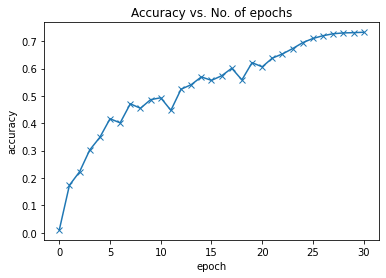

In [155]:
plot_accuracies(history_resnet9)

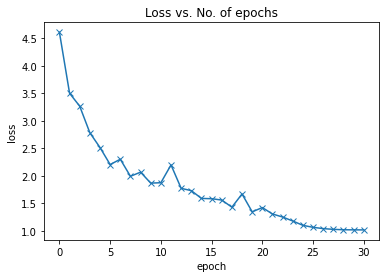

In [156]:
plot_losses(history_resnet9)

In [157]:
def plot_lrs(history_resnet9):
    lrs = np.concatenate([x.get('lrs', []) for x in history_resnet9])
    plt.plot(lrs)
    plt.xlabel('Batch no.')
    plt.ylabel('Learning rate')
    plt.title('Learning Rate vs. Batch no.');

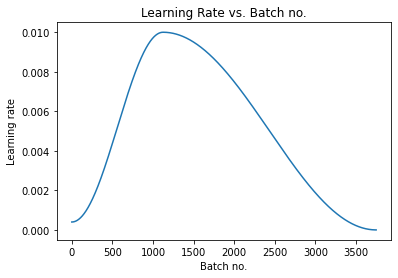

In [158]:
plot_lrs(history_resnet9)

Label: mountain , Predicted: train


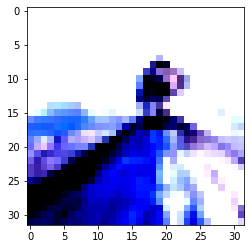

In [162]:
img, label = valid_ds[0]
plt.imshow(img.permute(1, 2, 0).clamp(0, 1))
print('Label:', train_ds.classes[label], ', Predicted:', predict_image(img, model_resnet9))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label: wardrobe , Predicted: wardrobe


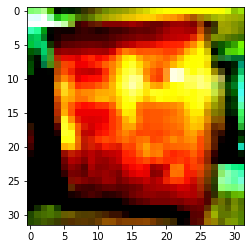

In [163]:
img, label = valid_ds[1002]
plt.imshow(img.permute(1, 2, 0))
print('Label:', valid_ds.classes[label], ', Predicted:', predict_image(img, model_resnet9))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label: spider , Predicted: spider


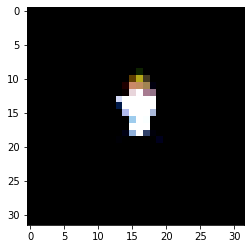

In [164]:
img, label = valid_ds[6153]
plt.imshow(img.permute(1, 2, 0))
print('Label:', train_ds.classes[label], ', Predicted:', predict_image(img, model_resnet9))

In [165]:
# Based on the above Models below are the accuracy and loss 

#1) Feed forward - 30% acc and 3.23 loss
#2) CNN          - 34% acc and 6.58 loss could be overfitting
#3) ResNet9      - 74% acc and 1.01 loss

In [166]:
# References :

# https://www.coursera.org/learn/machine-learning/
# https://www.deeplearning.ai/
# https://pytorch.org/
# https://towardsdatascience.com/wtf-is-image-classification-8e78a8235acb